In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

In [10]:
w = np.array([1 , 2])

In [13]:
error = y - np.dot(tx,w)

In [14]:
error

array([104.9315547 ,  71.43388117,  91.55946151, ...,  58.62717056,
        72.00276808,  52.89610924])

# Computing the Cost Function
Fill in the `compute_cost` function below:

In [18]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)


def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))


def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx.dot(w)
    print (e)
    return calculate_mse(e)

In [19]:
compute_loss(y, tx, w)

[104.9315547   71.43388117  91.55946151 ...  58.62717056  72.00276808
  52.89610924]


2694.4833658870843

# Grid Search

Fill in the function `grid_search()` below:

In [20]:
# from costs import *

def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    # compute loss for each combinationof w0 and w1.
    for ind_row, row in enumerate(w0):
        for ind_col, col in enumerate(w1):
            w = np.array([row, col])
            loss[ind_row, ind_col] = compute_loss(y, tx, w)
    return loss

Let us play with the grid search demo now!

[501.42890166 267.8194563  498.45086701 ...  60.87460724 278.35772033
 -20.85955405]
[489.52648436 263.977395   486.12978462 ...  64.85228836 274.11409981
 -13.82052357]
[477.62406705 260.13533371 473.80870223 ...  68.82996948 269.87047928
  -6.7814931 ]
[4.65721650e+02 2.56293272e+02 4.61487620e+02 ... 7.28076506e+01
 2.65626859e+02 2.57537380e-01]
[453.81923244 252.45121111 449.16653745 ...  76.78533173 261.38323823
   7.29656786]
[441.91681514 248.60914981 436.84545505 ...  80.76301285 257.1396177
  14.33559833]
[430.01439783 244.76708852 424.52437266 ...  84.74069397 252.89599718
  21.37462881]
[418.11198053 240.92502722 412.20329027 ...  88.71837509 248.65237665
  28.41365928]
[406.20956322 237.08296592 399.88220788 ...  92.69605622 244.40875613
  35.45268976]
[394.30714592 233.24090463 387.56112549 ...  96.67373734 240.1651356
  42.49172024]
[382.40472861 229.39884333 375.2400431  ... 100.65141846 235.92151507
  49.53075071]
[370.50231131 225.55678203 362.91896071 ... 104.6290995

[-112.40179119   48.94620785 -135.89441506 ...  225.16873732   39.80806967
  293.44069438]
[464.69420779 231.08476242 461.71617313 ...  24.13991336 241.62302645
 -57.59424793]
[452.79179048 227.24270112 449.39509074 ...  28.11759448 237.37940593
 -50.55521745]
[440.88937318 223.40063983 437.07400835 ...  32.09527561 233.1357854
 -43.51618697]
[428.98695587 219.55857853 424.75292596 ...  36.07295673 228.89216488
 -36.4771565 ]
[417.08453857 215.71651723 412.43184357 ...  40.05063785 224.64854435
 -29.43812602]
[405.18212126 211.87445594 400.11076118 ...  44.02831897 220.40492383
 -22.39909555]
[393.27970395 208.03239464 387.78967879 ...  48.00600009 216.1613033
 -15.36006507]
[381.37728665 204.19033334 375.46859639 ...  51.98368122 211.91768277
  -8.32103459]
[369.47486934 200.34827205 363.147514   ...  55.96136234 207.67406225
  -1.28200412]
[357.57245204 196.50621075 350.82643161 ...  59.93904346 203.43044172
   5.75702636]
[345.67003473 192.66414945 338.50534922 ...  63.91672458 199.

[291.25295522 154.36778196 283.25093954 ...  41.25984193 160.08733525
  -3.73812711]
[279.35053792 150.52572066 270.92985715 ...  45.23752305 155.84371472
   3.30090336]
[267.44812061 146.68365937 258.60877476 ...  49.21520417 151.6000942
  10.33993384]
[255.54570331 142.84159807 246.28769237 ...  53.19288529 147.35647367
  17.37896432]
[243.643286   138.99953677 233.96660997 ...  57.17056642 143.11285314
  24.41799479]
[231.7408687  135.15747548 221.64552758 ...  61.14824754 138.86923262
  31.45702527]
[219.83845139 131.31541418 209.32444519 ...  65.12592866 134.62561209
  38.49605574]
[207.93603409 127.47335288 197.0033628  ...  69.10360978 130.38199157
  45.53508622]
[196.03361678 123.63129159 184.68228041 ...  73.0812909  126.13837104
  52.5741167 ]
[184.13119948 119.78923029 172.36119802 ...  77.05897203 121.89475052
  59.61314717]
[172.22878217 115.94716899 160.04011563 ...  81.03665315 117.65112999
  66.65217765]
[160.32636487 112.10510769 147.71903323 ...  85.01433427 113.40750

[-43.04217129  21.58155566 -61.51081412 ... 103.9671761   17.26212823
 135.50294091]
[-54.94458859  17.73949436 -73.83189651 ... 107.94485722  13.0185077
 142.54197139]
[-66.8470059   13.89743307 -86.15297891 ... 111.92253834   8.77488718
 149.58100186]
[-78.7494232   10.05537177 -98.4740613  ... 115.90021947   4.53126665
 156.62003234]
[ -90.65184051    6.21331047 -110.79514369 ...  119.87790059    0.28764612
  163.65906282]
[-102.55425781    2.37124918 -123.11622608 ...  123.85558171   -3.9559744
  170.69809329]
[-114.45667512   -1.47081212 -135.43730847 ...  127.83326283   -8.19959493
  177.73712377]
[-126.35909242   -5.31287342 -147.75839086 ...  131.81094395  -12.44321545
  184.77615424]
[-138.26150973   -9.15493472 -160.07947325 ...  135.78862508  -16.68683598
  191.81518472]
[-150.16392703  -12.99699601 -172.40055565 ...  139.7663062   -20.9304565
  198.8542152 ]
[-162.06634434  -16.83905731 -184.72163804 ...  143.74398732  -25.17407703
  205.89324567]
[-173.96876164  -20.681118

 -84.24654534]
[217.78356747  80.89839421 209.78155178 ... -32.20954583  86.61794749
 -77.20751487]
[205.88115016  77.05633291 197.46046939 ... -28.23186471  82.37432697
 -70.16848439]
[193.97873286  73.21427161 185.139387   ... -24.25418358  78.13070644
 -63.12945391]
[182.07631555  69.37221031 172.81830461 ... -20.27650246  73.88708592
 -56.09042344]
[170.17389825  65.53014902 160.49722222 ... -16.29882134  69.64346539
 -49.05139296]
[158.27148094  61.68808772 148.17613983 ... -12.32114022  65.39984486
 -42.01236249]
[146.36906364  57.84602642 135.85505744 ...  -8.3434591   61.15622434
 -34.97333201]
[134.46664633  54.00396513 123.53397504 ...  -4.36577797  56.91260381
 -27.93430153]
[122.56422903  50.16190383 111.21289265 ...  -0.38809685  52.66898329
 -20.89527106]
[110.66181172  46.31984253  98.89181026 ...   3.58958427  48.42536276
 -13.85624058]
[98.75939442 42.47778124 86.57072787 ...  7.56726539 44.18174224
 -6.81721011]
[86.85697711 38.63571994 74.24964548 ... 11.54494651 39.

[ 91.95198413  19.54965893  80.60064776 ... -31.00034175  22.05673839
 -51.50751596]
[ 80.04956682  15.70759764  68.27956536 ... -27.02266063  17.81311786
 -44.46848548]
[ 68.14714952  11.86553634  55.95848297 ... -23.04497951  13.56949734
 -37.429455  ]
[ 56.24473221   8.02347504  43.63740058 ... -19.06729838   9.32587681
 -30.39042453]
[ 44.34231491   4.18141374  31.31631819 ... -15.08961726   5.08225629
 -23.35139405]
[ 32.4398976    0.33935245  18.9952358  ... -11.11193614   0.83863576
 -16.31236358]
[20.5374803  -3.50270885  6.67415341 ... -7.13425502 -3.40498477
 -9.2733331 ]
[ 8.63506299 -7.34477015 -5.64692898 ... -3.1565739  -7.64860529
 -2.23430262]
[ -3.26735431 -11.18683144 -17.96801138 ...   0.82110723 -11.89222582
   4.80472785]
[-15.16977162 -15.02889274 -30.28909377 ...   4.79878835 -16.13584634
  11.84375833]
[-27.07218892 -18.87095404 -42.61017616 ...   8.77646947 -20.37946687
  18.8827888 ]
[-38.97460623 -22.71301533 -54.93125855 ...  12.75415059 -24.62308739
  25.92

[ 13.73007001 -26.43083115   0.70407329 ... -45.70186216 -25.52998861
 -53.96363895]
[  1.8276527  -30.27289245 -11.6170091  ... -41.72418104 -29.77360914
 -46.92460847]
[-10.0747646  -34.11495375 -23.93809149 ... -37.74649992 -34.01722966
 -39.885578  ]
[-21.97718191 -37.95701504 -36.25917388 ... -33.76881879 -38.26085019
 -32.84654752]
[-33.87959921 -41.79907634 -48.58025627 ... -29.79113767 -42.50447072
 -25.80751705]
[-45.78201652 -45.64113764 -60.90133867 ... -25.81345655 -46.74809124
 -18.76848657]
[-57.68443382 -49.48319893 -73.22242106 ... -21.83577543 -50.99171177
 -11.72945609]
[-69.58685113 -53.32526023 -85.54350345 ... -17.85809431 -55.23533229
  -4.69042562]
[-81.48926843 -57.16732153 -97.86458584 ... -13.88041318 -59.47895282
   2.34860486]
[ -93.39168574  -61.00938283 -110.18566823 ...   -9.90273206  -63.72257334
    9.38763533]
[-105.29410304  -64.85144412 -122.50675062 ...   -5.92505094  -67.96619387
   16.42666581]
[-117.19652035  -68.69350542 -134.82783301 ...   -1.9

[ 226.94613954   17.5177622   222.71210963 ... -165.9678596    26.85134855
 -238.51797282]
[ 215.04372224   13.67570091  210.39102724 ... -161.99017848   22.60772802
 -231.47894235]
[ 203.14130493    9.83363961  198.06994485 ... -158.01249735   18.3641075
 -224.43991187]
[ 191.23888763    5.99157831  185.74886246 ... -154.03481623   14.12048697
 -217.4008814 ]
[ 179.33647032    2.14951702  173.42778007 ... -150.05713511    9.87686645
 -210.36185092]
[ 167.43405302   -1.69254428  161.10669768 ... -146.07945399    5.63324592
 -203.32282044]
[ 155.53163571   -5.53460558  148.78561529 ... -142.10177287    1.3896254
 -196.28378997]
[ 143.62921841   -9.37666687  136.46453289 ... -138.12409174   -2.85399513
 -189.24475949]
[ 131.7268011   -13.21872817  124.1434505  ... -134.14641062   -7.09761566
 -182.20572902]
[ 119.8243838   -17.06078947  111.82236811 ... -130.1687295   -11.34123618
 -175.16669854]
[ 107.92196649  -20.90285076   99.50128572 ... -126.19104838  -15.58485671
 -168.12766806]
[

 -114.27154725]
[ -77.42170338 -101.46189252  -91.28503027 ... -105.09343869 -101.36416844
 -107.23251677]
[ -89.32412068 -105.30395382 -103.60611266 ... -101.11575757 -105.60778897
 -100.1934863 ]
[-101.22653799 -109.14601512 -115.92719505 ...  -97.13807645 -109.85140949
  -93.15445582]
[-113.12895529 -112.98807641 -128.24827744 ...  -93.16039533 -114.09503002
  -86.11542535]
[-125.0313726  -116.83013771 -140.56935983 ...  -89.1827142  -118.33865054
  -79.07639487]
[-136.9337899  -120.67219901 -152.89044222 ...  -85.20503308 -122.58227107
  -72.03736439]
[-148.83620721 -124.5142603  -165.21152461 ...  -81.22735196 -126.82589159
  -64.99833392]
[-160.73862451 -128.3563216  -177.53260701 ...  -77.24967084 -131.06951212
  -57.95930344]
[-172.64104182 -132.1983829  -189.8536894  ...  -73.27198972 -135.31313265
  -50.92027297]
[-184.54345912 -136.0404442  -202.17477179 ...  -69.29430859 -139.55675317
  -43.88124249]
[-196.44587643 -139.88250549 -214.49585418 ...  -65.31662747 -143.8003737


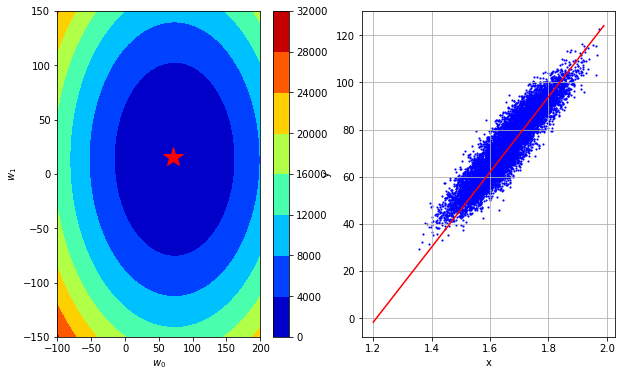

In [28]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [29]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

In [30]:
compute_gradient(y,tx,w)

(array([-72.293922  , -11.47971243]),
 array([104.9315547 ,  71.43388117,  91.55946151, ...,  58.62717056,
         72.00276808,  52.89610924]))

In [31]:
w_new1 = np.array([100 , 20])

In [32]:
compute_gradient(y,tx,w_new1)

(array([26.706078  ,  6.52028757]),
 array([-29.06155218, -38.86177905, -43.66452072, ..., -28.67844694,
        -39.47347627, -25.40914116]))

In [33]:
w_new2 = np.array([50 , 10])

In [34]:
compute_gradient(y,tx,w_new2)

(array([-23.293922  ,  -3.47971243]),
 array([40.37906275, 17.41358774, 26.45991385, ..., 14.82467389,
        17.45777059, 13.09377573]))

Please fill in the functions `gradient_descent` below:

In [35]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient(y, tx, w)
        loss = calculate_mse(err)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [51]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=1062606.4462798766, w0=-892.6706077997893, w1=901.3479712434987
Gradient Descent(1/49): loss=860714.1448053947, w0=-796.0741548195997, w1=812.5611453626477
Gradient Descent(2/49): loss=697181.3806110647, w0=-709.1373471374291, w1=732.6530020698817
Gradient Descent(3/49): loss=564719.8416136572, w0=-630.8942202234756, w1=660.7356731063924
Gradient Descent(4/49): loss=457425.9950257574, w0=-560.4754060009175, w1=596.010077039252
Gradient Descent(5/49): loss=370517.9792895585, w0=-497.0984732006151, w1=537.7570405788257
Gradient Descent(6/49): loss=300122.48654323746, w0=-440.059233680343, w1=485.329307764442
Gradient Descent(7/49): loss=243102.1374187173, w0=-388.72391811209815, w1=438.1443482314966
Gradient Descent(8/49): loss=196915.65462785604, w0=-342.5221341006777, w1=395.67788465184583
Gradient Descent(9/49): loss=159504.60356725843, w0=-300.94052849039934, w1=357.4580674301601
Gradient Descent(10/49): loss=129201.65220817438, w0=-263.5170834411489, w1=

In [52]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# Stochastic gradient descent

In [85]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [86]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/49): loss=2171.6754532724867, w0=48.21683964517567, w1=-47.21393691377801
SGD(1/49): loss=2186.496140444089, w0=44.44584465765311, w1=-45.76561597729197
SGD(2/49): loss=737.2983981025528, w0=88.95568018941348, w1=-21.14014243110949
SGD(3/49): loss=291.97967846843784, w0=63.346378023865554, w1=-7.833052519380567
SGD(4/49): loss=79.7668142066913, w0=84.09813092089178, w1=16.948274430245334
SGD(5/49): loss=16.57675333994607, w0=71.7522489825269, w1=13.550247837005877
SGD(6/49): loss=36.080685971605824, w0=68.35298254822953, w1=9.3594316777241
SGD(7/49): loss=105.37452640280316, w0=80.32086281387237, w1=24.907721005858626
SGD(8/49): loss=112.47256368607047, w0=87.18408663806457, w1=14.591772694339058
SGD(9/49): loss=29.553407276227944, w0=68.56176461258902, w1=15.917277871166
SGD(10/49): loss=59.86542168769982, w0=63.865953396333786, w1=13.748925373626264
SGD(11/49): loss=30.68849378782939, w0=74.86748057380683, w1=8.176022657162271
SGD(12/49): loss=31.65858288316803, w0=72.959179756

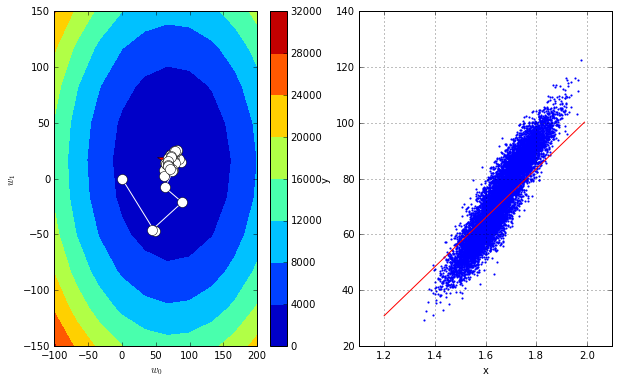

In [87]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))